In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15, 10]

In [3]:
import os
import minerl
import numpy as np
from torch.utils.data import Dataset
from tqdm import tqdm
import matplotlib.pyplot as plt
from dataset_preprocessing import MineRlSequenceDataset, MineRlImageDataset

/home/marthinwurer/.pyenv/versions/3.9.6/envs/minerl/lib/python3.9/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


In [4]:
dataset = MineRlSequenceDataset("data/npy_obtain_diamond", 32)

In [5]:
# compute return for each episode

In [6]:
ret = np.zeros_like(dataset.rew)

In [7]:
ret.shape

(1916597, 1)

In [10]:
current_ret = np.zeros_like(dataset.rew)

In [11]:
episodes = []

In [12]:
total = 0
start = 0
for idx in range(ret.shape[0]):
    total += dataset.rew[idx][0]
    current_ret[idx] = total
    if dataset.don[idx][0]:
        episodes.append((start, idx, total))
        total = 0
        start = idx + 1

In [13]:
ep = episodes

[(0, 26127, 1571.0),
 (26128, 35426, 1571.0),
 (35427, 43610, 67.0),
 (43611, 52648, 1571.0),
 (52649, 122174, 99.0),
 (122175, 142315, 547.0),
 (142316, 150078, 1571.0),
 (150079, 154820, 1571.0),
 (154821, 166392, 1571.0),
 (166393, 178845, 163.0),
 (178846, 189298, 1571.0),
 (189299, 194448, 1571.0),
 (194449, 206066, 1571.0),
 (206067, 218290, 1571.0),
 (218291, 242248, 1571.0),
 (242249, 265282, 1571.0),
 (265283, 281063, 1571.0),
 (281064, 283081, 35.0),
 (283082, 292049, 131.0),
 (292050, 303906, 99.0),
 (303907, 321778, 1571.0),
 (321779, 347261, 1571.0),
 (347262, 360593, 1571.0),
 (360594, 362487, 19.0),
 (362488, 376189, 1571.0),
 (376190, 378385, 35.0),
 (378386, 389122, 1571.0),
 (389123, 402131, 547.0),
 (402132, 468119, 1571.0),
 (468120, 486746, 1571.0),
 (486747, 489652, 35.0),
 (489653, 500119, 547.0),
 (500120, 501098, 1.0),
 (501099, 505233, 1571.0),
 (505234, 510691, 1571.0),
 (510692, 535955, 1571.0),
 (535956, 563190, 1571.0),
 (563191, 573729, 1571.0),
 (573730,

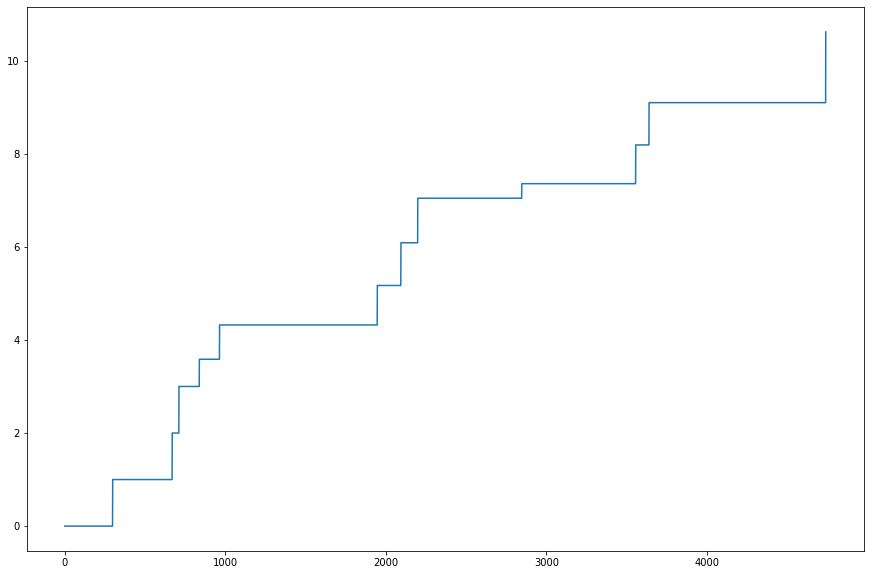

In [24]:
ep = 7
plt.plot(np.log2(current_ret+1)[episodes[ep][0]:episodes[ep][1]+1])